# Problem Statement

With the rise of digital communication, SMS spam has become a significant issue. Spam messages include fraudulent schemes, ads, and malicious links, which can cause inconvenience and security risks. Manually identifying spam is not scalable.

The goal of this project is to develop a machine learning model that automatically classifies SMS messages as Spam or Ham (legitimate).

# Importing Libraries
We start by importing the required Python libraries for data analysis and visualization:

- **pandas, numpy** → Data manipulation and numerical operations  
- **seaborn, matplotlib** → Data visualization  
- **warnings** → To ignore unnecessary warning messages


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset
We load the `spam.csv` dataset using pandas.


In [2]:
df=pd.read_csv('Dataset_5971.csv')

In [3]:
df.sample(5)

,LABEL,TEXT,URL,EMAIL,PHONE
5696,Smishing,Todays Voda numbers ending 7548 are selected t...,No,No,yes
2616,ham,I'm expressing my gratitude brother. I promis...,No,No,No
2914,spam,PPORTUNITY to Own flat on NOIDA Xprsway *2bhk-...,No,No,yes
5591,ham,I am going to sao mu today. Will be done only ...,No,No,No
3898,ham,For real when u getting on yo? I only need 2 m...,No,No,No


In [4]:
#Check Data Shape
df.shape

(5971, 5)

In [5]:
#Check Missing Values
df.isnull().sum()

LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64

In [6]:
#Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


# Removing Unnecessary Columns
Dropping irrelevant columns (`URL`, `EMAIL`, `PHONE`) that are not useful for analysis.


In [7]:
df.drop(columns=['URL','EMAIL','PHONE'],axis=1,inplace=True)

In [8]:
df.head()

,LABEL,TEXT
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,Smishing,Please Stay At Home. To encourage the notion o...


In [9]:
##Rename Columns
df.rename(columns={'LABEL':'target','TEXT':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,Smishing,Please Stay At Home. To encourage the notion o...


## Label Encoding
We use `LabelEncoder` to convert categorical labels (Spam/Ham) into numeric values:  
- **Ham → 0**  
- **Spam → 1**


In [11]:
#Check Unique Values
df['target'].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [12]:
#Convert ham and spam
df['target'] = df['target'].apply(lambda x: 'ham' if x.lower() == 'ham' else 'spam')

In [13]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [14]:
#Apply Encoder 
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
df['target']=le.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,0,What's up? Do you want me to come online? If y...
2,0,So u workin overtime nigpun?
3,0,"Also sir, i sent you an email about how to log..."
4,1,Please Stay At Home. To encourage the notion o...


In [18]:
df.isnull().sum()

target    0
text      0
dtype: int64

## Checking Duplicates And Removing Duplicates
Counting duplicate rows in the dataset.


In [19]:
df.duplicated().sum()

22

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5949, 2)

# Exploratory Data Analysis (EDA)
Beginning the data exploration process.


In [23]:
df['target'].value_counts()

target
0    4834
1    1115
Name: count, dtype: int64

## Pie Chart of Spam vs Ham
Visualizing the proportion of Spam and Ham messages using a pie chart.

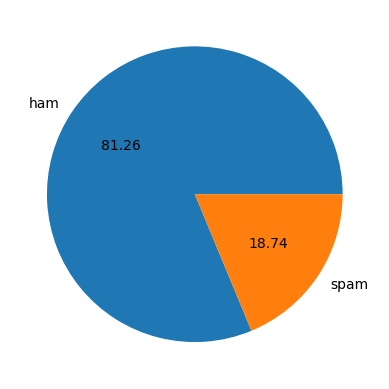

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# Data Is Imbalanced To Balanced Them Used Oversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
x=df[['text']]
y=df['target']
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)
df = pd.DataFrame({'text': x_resampled['text'], 'target': y_resampled})

In [27]:
print(df['target'].value_counts())

target
0    4834
1    4834
Name: count, dtype: int64


## Importing NLTK
Importing **Natural Language Toolkit (NLTK)** for text preprocessing (tokenization, stopwords, etc.).

In [28]:
import nltk

In [29]:
df['num_charecters']=df['text'].apply(len)

In [30]:
df['num_words']=df['text'].apply(lambda X: len(nltk.word_tokenize(X)))

In [31]:
df['num_sentences']=df['text'].apply(lambda X: len(nltk.sent_tokenize(X)))

In [32]:
df.head()

,text,target,num_charecters,num_words,num_sentences
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,136,37,11
1,What's up? Do you want me to come online? If y...,0,79,20,3
2,So u workin overtime nigpun?,0,28,6,1
3,"Also sir, i sent you an email about how to log...",0,173,37,3
4,Please Stay At Home. To encourage the notion o...,1,152,27,4


## Feature Engineering - Character Count,Word Count,Sentence Count
Creating a new column `num_characters`,`num_words`,`num_sentence` to store the length of each message.


In [33]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,9668.000000,9668.000000,9668.000000
mean,103.689905,21.914357,2.266653
std,56.972180,11.847445,1.491765
min,2.000000,1.000000,1.000000
25%,50.000000,12.000000,1.000000
50%,112.000000,23.000000,2.000000
75%,149.000000,29.000000,3.000000
max,910.000000,220.000000,38.000000


In [34]:
#For Ham Messages
df[df['target']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4834.000000,4834.000000,4834.000000
mean,70.677079,17.176252,1.829127
std,56.169202,13.461595,1.407824
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#For Spam Messages
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4834.000000,4834.000000,4834.000000
mean,136.702731,26.652462,2.704179
std,34.017740,7.391202,1.444395
min,18.000000,2.000000,1.000000
25%,123.000000,23.000000,2.000000
50%,145.000000,27.000000,2.000000
75%,156.000000,31.000000,4.000000
max,383.000000,75.000000,9.000000


## Character Count Distribution
Comparing message lengths (characters) for Ham vs Spam using histograms.

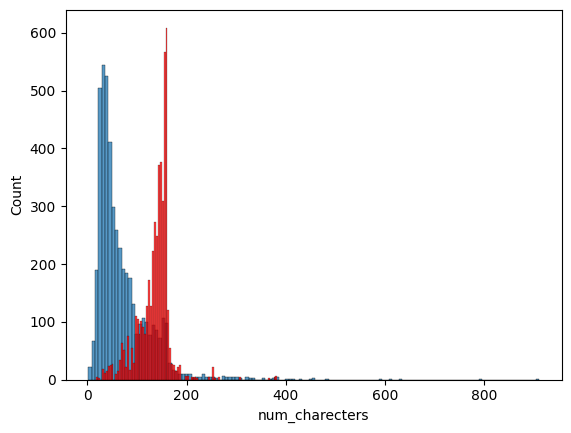

In [36]:
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='red')
plt.show()

## Pairwise Feature Relationships
Using Seaborn’s pairplot to visualize relationships between numeric features by target label.

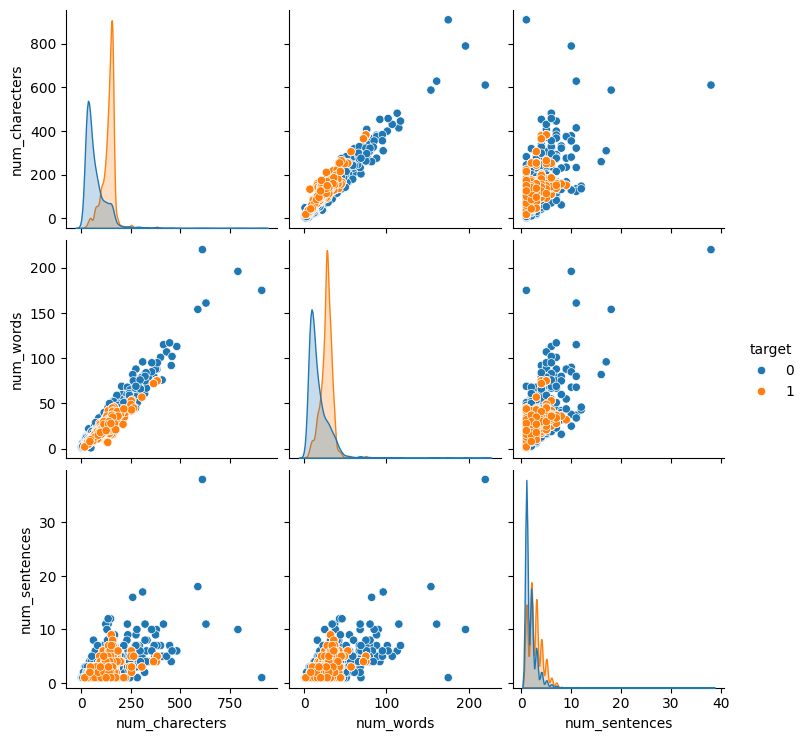

In [37]:
sns.pairplot(df,hue='target')
plt.show()

## Correlation Heatmap
Visualizing correlation between numerical features.


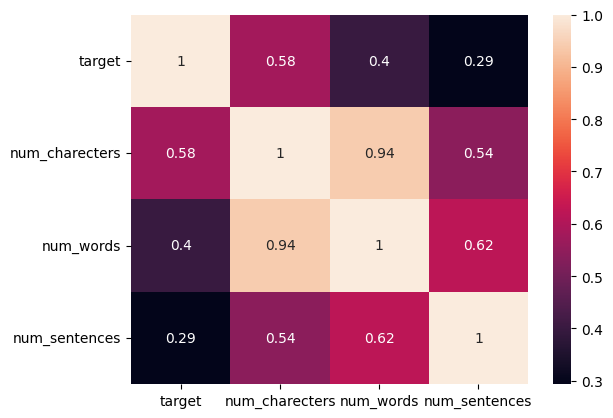

In [38]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

## Text Preprocessing
Importing necessary modules for text cleaning and preprocessing:
- **stopwords** → Removing common English words  
- **punctuation** → Removing punctuations  
- **Lemmatizer** → Reducing words to their stem form


In [39]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

## Text Transformation Function
Defining `text_transform()` to:
1. Lowercase text  
2. Tokenize into words  
3. Remove non-alphanumeric tokens  
4. Remove stopwords and punctuation  
5. Apply stemming  
6. Join tokens back into a clean string


In [40]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(lemmatizer.lemmatize(i))
        
    return " ".join(y)

In [41]:
df['transform_text']=df['text'].apply(text_transform)

In [42]:
df.head()

,text,target,num_charecters,num_words,num_sentences,transform_text
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,136,37,11,opinion jada kusruthi lovable silent spl chara...
1,What's up? Do you want me to come online? If y...,0,79,20,3,want come online free talk
2,So u workin overtime nigpun?,0,28,6,1,u workin overtime nigpun
3,"Also sir, i sent you an email about how to log...",0,173,37,3,also sir sent email log usc payment portal sen...
4,Please Stay At Home. To encourage the notion o...,1,152,27,4,please stay home encourage notion staying home...


## Word Cloud
Preparing to generate a WordCloud to visualize the most frequent words in SMS messages.


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
word_count=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

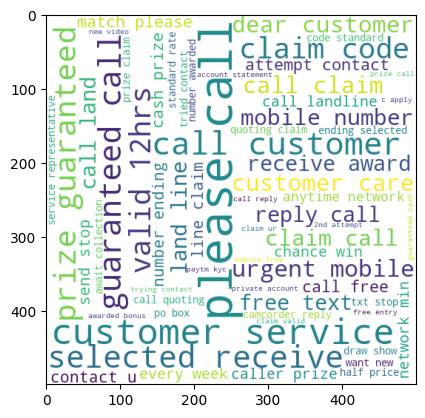

In [45]:
plt.imshow(word_count)

### Most Common Words in Spam Messages

In this step, we:
1. Create a `spam_corpus` by extracting all words from messages labeled as **spam**.
2. Use the `Counter` class to calculate the frequency of each word in spam messages.
3. Visualize the **Top 20 most common words** appearing in spam texts using a bar chart.

This helps us understand which words are frequently used in spam messages and can provide useful insights for feature engineering or model building.


In [46]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

70546

In [48]:
from collections import Counter
Counter(spam_corpus).most_common(20)

[('call', 2376),
 ('free', 1210),
 ('2', 950),
 ('mobile', 836),
 ('claim', 801),
 ('u', 800),
 ('customer', 739),
 ('txt', 694),
 ('text', 657),
 ('ur', 650),
 ('prize', 626),
 ('reply', 605),
 ('stop', 566),
 ('4', 558),
 ('please', 550),
 ('contact', 454),
 ('c', 449),
 ('service', 421),
 ('get', 401),
 ('urgent', 390)]

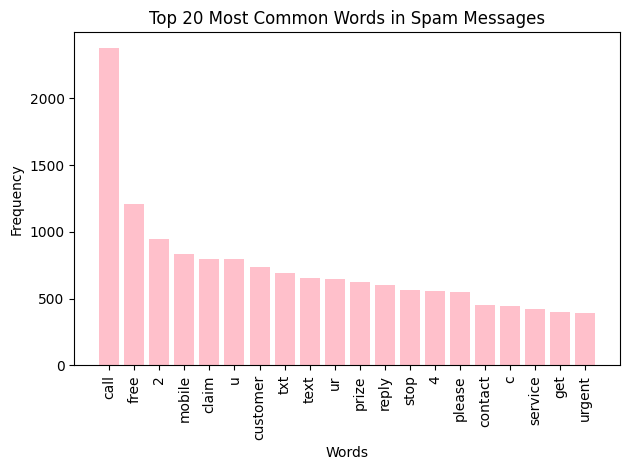

In [49]:
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1],color='pink')
plt.xticks(rotation=90)
plt.title("Top 20 Most Common Words in Spam Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [50]:
df.head()

,text,target,num_charecters,num_words,num_sentences,transform_text
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,136,37,11,opinion jada kusruthi lovable silent spl chara...
1,What's up? Do you want me to come online? If y...,0,79,20,3,want come online free talk
2,So u workin overtime nigpun?,0,28,6,1,u workin overtime nigpun
3,"Also sir, i sent you an email about how to log...",0,173,37,3,also sir sent email log usc payment portal sen...
4,Please Stay At Home. To encourage the notion o...,1,152,27,4,please stay home encourage notion staying home...


### Feature Extraction using TF-IDF

To prepare our text data for machine learning models:

 **TF-IDF Vectorization**  
   - We use `TfidfVectorizer` to convert the cleaned text into numerical features.  
   - The parameter `max_features=3000` ensures we only keep the top 3000 important words.  
   - This reduces dimensionality while capturing the most meaningful terms.
    
     **Feature Matrix & Target Variable**  
   - `X` contains the transformed text data (TF-IDF matrix).  
   - `y` contains the labels (0 = Ham, 1 = Spam).


This step converts raw text into machine-readable numerical vectors that can be fed into machine learning models.


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
td=TfidfVectorizer(max_features=3000,ngram_range=(1,3))

In [53]:
#Independent Features
X=td.fit_transform(df['transform_text']).toarray()

In [54]:
X.shape

(9668, 3000)

In [55]:
#Dependent Features
y=df['target'].values

 **Train-Test Split**  
   - The dataset is split into **training (80%)** and **testing (20%)** sets using `train_test_split`.  
   - `random_state=2` ensures reproducibility of results.

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

### Model Training and Evaluation

We train and evaluate multiple machine learning models on the SMS Spam dataset to identify the best performing algorithm.  


In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc

## **Models Used**
   - Multinomial Naive Bayes   
   - Logistic Regression  
   - Random Forest Classifier  
   - Gradient Boosting Classifier  
   - Decision Tree Classifier  


In [59]:
models={
    "Naive_Bayes":MultinomialNB(),
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}

## **Training vs Testing Performance**
   - Each model is fit on the training set (`X_train`, `y_train`).  
   - Predictions are made on both training and testing sets.  
   - Performance metrics are displayed for comparison.  

This step helps in selecting the **best model** by analyzing how each algorithm performs in detecting spam vs ham messages.


In [60]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
     # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Naive_Bayes
Model performance for Training set
- Accuracy: 0.9428
- F1 score: 0.9428
- Precision: 0.9516
- Recall: 0.9341
- Roc Auc Score: 0.9429
----------------------------------
Model performance for Test set
- Accuracy: 0.9369
- F1 score: 0.9369
- Precision: 0.9358
- Recall: 0.9338
- Roc Auc Score: 0.9368


Logisitic Regression
Model performance for Training set
- Accuracy: 0.9819
- F1 score: 0.9819
- Precision: 0.9835
- Recall: 0.9805
- Roc Auc Score: 0.9819
----------------------------------
Model performance for Test set
- Accuracy: 0.9772
- F1 score: 0.9772
- Precision: 0.9775
- Recall: 0.9755
- Roc Auc Score: 0.9772


Decision Tree
Model performance for Training set
- Accuracy: 0.9992
- F1 score: 0.9992
- Precision: 0.9995
- Recall: 0.9990
- Roc Auc Score: 0.9992
----------------------------------
Model performance for Test set
- Accuracy: 0.9721
- F1 score: 0.9721
- Precision: 0.9510
- Recall: 0.9936
- Roc Auc Score: 0.9727


Random Forest
Model performance for Training set
-

### Model Comparison & Conclusion

After training and evaluating multiple machine learning models, we observed the following:

 **Naive Bayes**
   - Performed **consistently well** on both training and test sets.  
   - Achieved **high precision** → very effective at avoiding false positives (important for spam detection).  
   - Recall was slightly lower, meaning some spam messages may be missed.  
   - Overall, it is **lightweight, fast, and reliable** for text classification tasks.

 **Random Forest**
   - Achieved **very high accuracy and F1 score** on both training and testing.  
   - Balanced precision and recall, making it a **strong and robust model**.  
   - Slightly slower than Naive Bayes due to being an ensemble of many trees.  

 **Other Models**
   - **Logistic Regression** performed well but with slightly lower recall compared to Naive Bayes.  
   - **Decision Tree** showed signs of **overfitting** (near-perfect training performance, lower test accuracy).  
   - **Gradient Boosting** performed decently but did not outperform Random Forest or Naive Bayes.


### Ensemble Model (Naive Bayes + Random Forest)

The **Voting Classifier** combines the strengths of:
- **Naive Bayes** → high precision, fast, lightweight.  
- **Random Forest** → robust, balanced accuracy, and strong recall.  

We used **soft voting**, where predictions are based on the average probability from both models.  


In [61]:
from sklearn.ensemble import VotingClassifier
# Initialize models
nb = MultinomialNB()
rf = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=42)

# Create Voting model
fineal_model = VotingClassifier(estimators=[('naive_bayes', nb), ('random_forest', rf)],voting='soft')

# Fit the model
fineal_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = fineal_model.predict(X_train)
y_test_pred = fineal_model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nModel performance for {dataset_name}")
    print(f"- Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"- F1 score: {f1_score(y_true, y_pred):.4f}")
    print(f"- Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"- Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"- Roc Auc Score: {roc_auc_score(y_true, y_pred):.4f}")

evaluate_model(y_train, y_train_pred, "Training set")
evaluate_model(y_test, y_test_pred, "Test set")



Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9990
- Recall: 0.9964
- Roc Auc Score: 0.9977

Model performance for Test set
- Accuracy: 0.9912
- F1 score: 0.9909
- Precision: 0.9936
- Recall: 0.9883
- Roc Auc Score: 0.9911


**Results:**
- On the training set, the model achieves strong performance with high accuracy and F1 score.  
- On the test set, it generalizes well, combining the precision of Naive Bayes with the robustness of Random Forest.  

The ensemble proves to be a **well-balanced final model**, reducing individual weaknesses while maintaining high accuracy for spam detection.


### ROC Curve for Ensemble Model

To further evaluate the **Voting Classifier (Naive Bayes + Random Forest)**, we plot the **ROC (Receiver Operating Characteristic) Curve**:


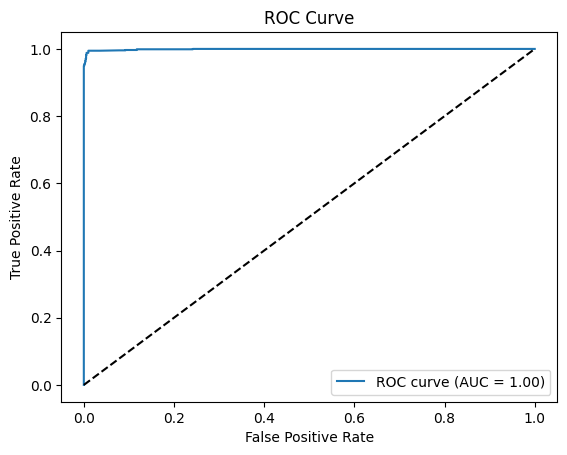

In [62]:
y_proba = fineal_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Saving the Model and Vectorizer

To deploy or reuse the trained model, we save the important components using **Pickle**:

1. **TF-IDF Vectorizer (`vectorizer.pkl`)**  
   - Stores the fitted TF-IDF transformation so that new SMS messages can be converted into the same feature space as the training data.  

2. **Trained Model (`model.pkl`)**  
   - Stores the best-performing trained model (in this case, the chosen classifier).  
   - This allows us to make predictions on new/unseen data without retraining the model.  

By saving these files, we make the system ready for **deployment** or integration into applications such as a web app or API.


In [63]:
import pickle
pickle.dump(td,open('vectorizer.pkl','wb'))
pickle.dump(fineal_model,open('model.pkl','wb'))

In [64]:
#To Check Model Prediction

In [65]:
import pickle
# Load saved vectorizer and model
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

In [66]:
#Create Fuction For Predict New Messages
def check_message(message):
    processed = text_transform(message)
    vectorized = vectorizer.transform([processed])
    proba = model.predict_proba(vectorized)[0]
    
    prob_ham, prob_spam = proba
    print(f"Probability -> Ham: {prob_ham*100:.2f}%, Spam: {prob_spam*100:.2f}%")
    
    return "Ham" if prob_ham > prob_spam else "Spam"


In [67]:
#Try Spam And Ham Messages To Check
print(check_message('Your Amazon order has been shipped. Track here: amazon.com/track123.'))
print(check_message("Congratulations! You’ve won a free iPhone. Click here to claim your prize."))
print(check_message("Hey, are we still meeting tomorrow?"))
print(check_message('URGENT: Your account is on hold due to suspicious activity. Verify immediately at secure-login-update.com.'))

Probability -> Ham: 52.21%, Spam: 47.79%
Ham
Probability -> Ham: 7.01%, Spam: 92.99%
Spam
Probability -> Ham: 99.70%, Spam: 0.30%
Ham
Probability -> Ham: 28.91%, Spam: 71.09%
Spam
